In [1]:
#Libraries


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Variable Attribution

In [3]:
file_path = 'UMF4_Test_Bottom and Top.gcode'

with open(file_path, 'r') as file:
    lines = file.readlines()

specific_line = lines [7]
Nozzle_temperature = specific_line.strip(';EXTRUDER_TRAIN.0.INITIAL_TEMPERATURE:')
print('Nozzle temperature:', Nozzle_temperature,'ºC')


Nozzle temperature: 220
 ºC


In [4]:
file_path = 'UMF4_Test_Bottom and Top.gcode'

with open(file_path, 'r') as file:
    lines = file.readlines()

specific_line = lines [12]
Plate_temperature = specific_line.strip(';BUILD_PLATE.INITIAL_TEMPERATURE:')
print('Plate temperature:',Plate_temperature,'ºC')


Plate temperature: 60
 ºC


In [5]:
file_path = 'UMF4_Test_Bottom and Top.gcode'

with open(file_path, 'r') as file:
    lines = file.readlines()

specific_line = lines [13]
Volume_temperature = specific_line.strip(';BUILD_VOLUME.TEMPERATURE:')
print('Volume temperature:', Volume_temperature, 'ºC')

Volume temperature: 35
 ºC


In [6]:
def read_gcode_parameters(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    nozzle_temperature = lines[7].strip(';EXTRUDER_TRAIN.0.INITIAL_TEMPERATURE:').strip()
    plate_temperature = lines[12].strip(';BUILD_PLATE.INITIAL_TEMPERATURE:').strip()
    volume_temperature = lines[13].strip(';BUILD_VOLUME.TEMPERATURE:').strip()

    return float(nozzle_temperature), float(plate_temperature), float(volume_temperature)


file_path = 'UMF4_Test_Bottom and Top.gcode'
nozzle_temperature, plate_temperature, volume_temperature = read_gcode_parameters(file_path)
print('Nozzle temperature:', nozzle_temperature, 'ºC')
print('Plate temperature:', plate_temperature, 'ºC')
print('Volume temperature:', volume_temperature, 'ºC')


Nozzle temperature: 220.0 ºC
Plate temperature: 60.0 ºC
Volume temperature: 35.0 ºC


In [16]:
# Define acceptable ranges
acceptable_ranges = {
    'temperature_extruder': (200, 240), 
    'temperature_bed': (50, 70),  
    'volume_temperature': (30, 40)  
}

def get_temperature_extruder():
    return np.random.normal(220, 5) 

def get_temperature_bed():
    return np.random.normal(60, 2)  

def get_volume_temperature():
    return np.random.normal(35, 2) 


def check_values(data_row):
    alerts = []
    for param, (min_val, max_val) in acceptable_ranges.items():
        if not (min_val <= data_row[param] <= max_val):
            alerts.append(f"Alert: {param} out of range. Current value: {data_row[param]}")
    return alerts


In [22]:
columns = ['timestamp', 'temperature_extruder', 'temperature_bed', 'volume_temperature']
data = pd.DataFrame(columns=columns)

try:
    for _ in range(100):
        data_row = {
            'timestamp': time.time(),
            'temperature_extruder': get_temperature_extruder(),
            'temperature_bed': get_temperature_bed(),
            'volume_temperature': get_volume_temperature()
        }
        data_row_df = pd.DataFrame([data_row])
        if not data_row_df.isnull().all(axis=None):
            data = pd.concat([data, data_row_df], ignore_index=True)
        alerts = check_values(data_row)
        if alerts:
            for alert in alerts:
                print(alert)
            print("Stopping the 3D printer due to the above issues.")
            break
        print(data_row)
        time.sleep(0.5)  
except KeyboardInterrupt:
    print("Data collection stopped manually.")


data.to_csv('3d_printer_data_simulated.csv', index=False)
print("Data collection completed and saved to '3d_printer_data_simulated.csv'")


C:\Users\diljo\AppData\Local\Temp\ipykernel_13568\1576800235.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, data_row_df], ignore_index=True)


{'timestamp': 1719563418.9552603, 'temperature_extruder': 220.90037823319733, 'temperature_bed': 58.355242650803525, 'volume_temperature': 34.971255337960656}
{'timestamp': 1719563419.4828637, 'temperature_extruder': 216.53340620019338, 'temperature_bed': 58.76803384378912, 'volume_temperature': 34.17541029735608}
{'timestamp': 1719563419.984473, 'temperature_extruder': 217.69097172351385, 'temperature_bed': 59.84980330457363, 'volume_temperature': 32.717541627960216}
{'timestamp': 1719563420.485985, 'temperature_extruder': 229.09178386188955, 'temperature_bed': 57.58240991682271, 'volume_temperature': 35.007390812663495}
{'timestamp': 1719563420.9876726, 'temperature_extruder': 223.9718489915968, 'temperature_bed': 59.477241201747276, 'volume_temperature': 38.230431121501894}
{'timestamp': 1719563421.4891703, 'temperature_extruder': 217.32265903420014, 'temperature_bed': 58.49954133081454, 'volume_temperature': 31.84666133285441}
{'timestamp': 1719563421.9911065, 'temperature_extruder

In [18]:

df = pd.read_csv('3d_printer_data_simulated.csv')


df.fillna(df.mean(), inplace=True)


from sklearn.preprocessing import MinMaxScaler

features = df.drop(['timestamp'], axis=1) 
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

X = features_scaled  
y = np.random.choice([0, 1], size=len(df)) 

pd.DataFrame(features_scaled, columns=features.columns).head()


,temperature_extruder,temperature_bed,volume_temperature
0,0.733841,0.521695,0.773277
1,0.268973,0.636556,0.190115
2,0.841039,0.271221,0.456430
3,0.710537,0.851287,0.924686
4,0.674734,0.345547,0.812558


In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.64      0.64      0.64        11

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



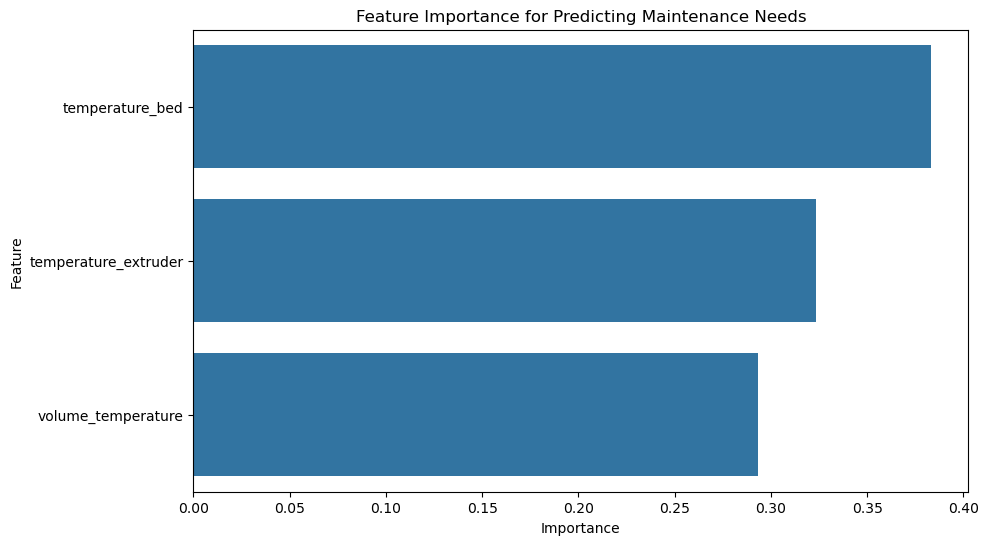

In [20]:
# Plot feature importance
feature_importance = model.feature_importances_
features_names = features.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Predicting Maintenance Needs')
plt.show()


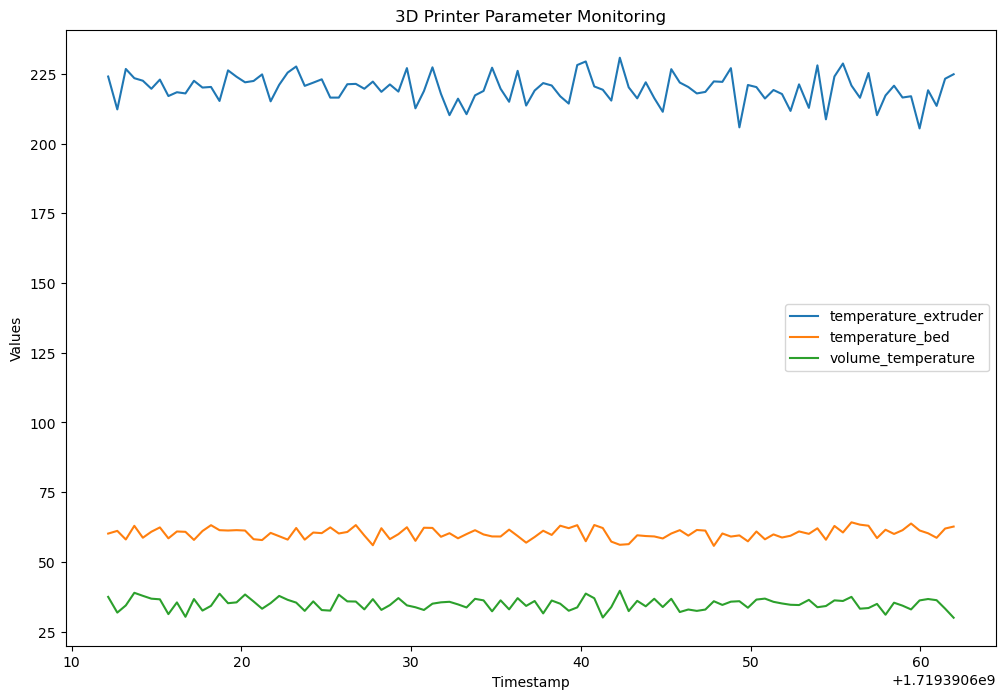

In [21]:

df = pd.read_csv('3d_printer_data_simulated.csv')


df.head()

plt.figure(figsize=(12, 8))
for column in columns[1:]:  # Exclude 'timestamp'
    plt.plot(df['timestamp'], df[column], label=column)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('3D Printer Parameter Monitoring')
plt.legend()
plt.show()


# GCode

## Bottom Layer (Beggining)

In [15]:
file_path = 'UMF4_Test_Bottom and Top.gcode'

with open(file_path, 'r') as file:
    lines = file.readlines()

bottom_layer = lines [0:775]
print (bottom_layer)


[';START_OF_HEADER\n', ';HEADER_VERSION:0.1\n', ';FLAVOR:Griffin\n', ';GENERATOR.NAME:Cura_SteamEngine\n', ';GENERATOR.VERSION:5.7.2\n', ';GENERATOR.BUILD_DATE:2024-05-30\n', ';TARGET_MACHINE.NAME:Ultimaker Factor 4\n', ';EXTRUDER_TRAIN.0.INITIAL_TEMPERATURE:220\n', ';EXTRUDER_TRAIN.0.MATERIAL.VOLUME_USED:7024\n', ';EXTRUDER_TRAIN.0.MATERIAL.GUID:03f24266-0291-43c2-a6da-5211892a2699\n', ';EXTRUDER_TRAIN.0.NOZZLE.DIAMETER:0.4\n', ';EXTRUDER_TRAIN.0.NOZZLE.NAME:AA 0.4\n', ';BUILD_PLATE.INITIAL_TEMPERATURE:60\n', ';BUILD_VOLUME.TEMPERATURE:35\n', ';PRINT.TIME:1707\n', ';PRINT.GROUPS:1\n', ';PRINT.SIZE.MIN.X:80.1\n', ';PRINT.SIZE.MIN.Y:20\n', ';PRINT.SIZE.MIN.Z:0.2\n', ';PRINT.SIZE.MAX.X:310\n', ';PRINT.SIZE.MAX.Y:129.792\n', ';PRINT.SIZE.MAX.Z:20.001\n', ';SLICE_UUID:b6ac094a-d86f-44cf-91a4-27891440ac2d\n', ';END_OF_HEADER\n', ';Generated with Cura_SteamEngine 5.7.2\n', 'T0\n', 'M82 ;absolute extrusion mode\n', '\n', 'G92 E0\n', 'M190 S60\n', 'M104 S220\n', 'M109 S220\n', 'G280 S1\n', 'G0

## Bottom Layers